<a href="https://colab.research.google.com/github/leeyerin25/TIL_python/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_3_1_yr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/기계학습/suicide_data.csv')
train.head()

,ID,apt_t,sex,cfam,allownc,house,live_t,marri_2,tins,npins,...,N_CHOL,N_CHO,N_TDF,N_CA,N_FE,N_NA,N_K,N_VITC,LF_SAFE,LF_S2
0,A739211515,1,2,3,20,2,3,1,10,1,...,220.911,213.937,12.957,469.710,9.405,2117.652,2540.971,31.666,2,3
1,A739211516,1,1,3,20,2,3,1,10,1,...,352.617,274.917,20.682,372.172,14.404,3699.691,2589.378,43.118,2,3
2,A739211517,1,2,3,20,2,3,3,20,1,...,136.681,272.175,19.292,266.870,13.276,2265.539,2073.714,105.935,2,3
3,A739219614,1,1,4,20,1,3,1,20,1,...,41.882,243.170,25.090,358.145,20.760,4282.505,1830.424,41.371,2,3
4,A739219615,1,2,4,20,1,3,1,20,1,...,140.545,288.721,30.959,487.907,14.351,2875.440,6069.345,88.895,2,3


In [5]:
import pandas as pd
import numpy as np
from collections import Counter
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# 새 섹션

In [6]:
from google.colab import drive
drive.mount('/sample_data')

Mounted at /sample_data


numeric => 나이와 같은 숫자

In [9]:
np.random.seed(3)
tf.random.set_seed(3)

df = train

결측값제거 / 파이썬에서 nan 은 numeric 만 찾아낼수있음 -> numeric 으로 다 변환필요

In [11]:
df = df.replace({'cfam':8, 'cfam':np.nan})
df = df.replace({'cfam':9, 'cfam':np.nan})
df = df.replace({'BD1_11':8, 'BD1_11':np.nan})
df = df.replace({'BD1_11':9, 'BD1_11':np.nan})
df = df.replace({'BE8_1':88, 'BE8_1':np.nan})
df = df.replace({'BE8_1':99, 'BE8_1':np.nan})

뉴메릭으로 변환하는 과정임.  근데이거먼저해야하는거아닌가??
coerce -> numeric 으로 변환안될시 null값으로 변경해줌

In [10]:
df = df.iloc[:,1:].apply(pd.to_numeric, errors='coerce')

널값이 있는 부분을 다 찝어주는 함수 (변수,널값수)

3500명이상(50%이상)은 쓸수없음.

In [12]:
def null_check(df):
    null = df.isnull().sum()
    
    null_col=[]

    for i in range(len(df.columns)):
        if (null[i]!=0):
            print(null.index[i],null[i])
            null_col.append(null.index[i])

null_check(df)

mh_stress 1445
L_OUT_FQ 750
mh_suicide 1445
BE8_1 476
LW_mt 3608
LW_oc 3608
HE_HP 2176
HE_anem 1555
O_chew_d 1976
L_BR_FQ 750
L_LN_FQ 750
L_DN_FQ 750
DI2_pr 476
DI3_pr 476
DI4_pr 921
DI5_pr 476
DI6_pr 476
DM1_pr 924
DM2_pr 476
DM3_pr 476
DM4_pr 476
D_8_2 476
D_8_4 476
DJ4_pr 476
DE1_pr 476
DE2_pr 476
DC1_pr 476
DC2_pr 476
DC3_pr 476
DC4_pr 476
DC5_pr 476
DC6_pr 476
DC7_pr 476
DF2_pr 476
DL1_pr 476
DJ8_pr 476
DH2_pr 476
DH3_pr 476
DN1_pr 476
DK8_pr 476
DK9_pr 476
DK4_pr 476
LQ4_00 476
LQ1_sb 476
LQ_1EQL 476
LQ_2EQL 476
LQ_3EQL 476
LQ_4EQL 476
LQ_5EQL 476
educ 476
EC1_1 476
BO1 476
BO1_1 476
BO2_1 476
BD1_11 476
incm 52
edu 968
occp 2025
HE_wt 409
HE_wc 413
HE_BMI 421
N_EN 752
N_WATER 752
N_PROT 752
N_FAT 752
N_SFA 752
N_MUFA 752
N_PUFA 752
N_CHOL 752
N_CHO 752
N_TDF 752
N_CA 752
N_FE 752
N_NA 752
N_K 752
N_VITC 752
LF_SAFE 427
LF_S2 427


lable 에 값이 없는것들은 살릴수없음 . lable 없는거 먼저 지워야한다!! row 가 줄은걸 확인할수있다.

In [13]:
df1 = df.dropna(subset=['mh_suicide'])
df1

,apt_t,sex,cfam,allownc,house,live_t,marri_2,tins,npins,mh_stress,...,N_CHOL,N_CHO,N_TDF,N_CA,N_FE,N_NA,N_K,N_VITC,LF_SAFE,LF_S2
0,1,2,3,20,2,3,1,10,1,0.0,...,220.911,213.937,12.957,469.710,9.405,2117.652,2540.971,31.666,2.0,3.0
1,1,1,3,20,2,3,1,10,1,1.0,...,352.617,274.917,20.682,372.172,14.404,3699.691,2589.378,43.118,2.0,3.0
3,1,1,4,20,1,3,1,20,1,0.0,...,41.882,243.170,25.090,358.145,20.760,4282.505,1830.424,41.371,2.0,3.0
4,1,2,4,20,1,3,1,20,1,0.0,...,140.545,288.721,30.959,487.907,14.351,2875.440,6069.345,88.895,2.0,3.0
7,1,2,1,20,3,3,3,10,1,1.0,...,72.310,210.397,15.754,264.357,5.499,3105.538,2331.930,224.503,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,2,1,4,10,1,2,88,30,2,0.0,...,691.964,702.860,30.675,729.327,21.411,6821.265,5393.122,85.347,3.0,1.0
7376,2,2,2,20,1,2,3,10,2,0.0,...,227.482,297.520,42.728,503.535,19.751,3801.607,5115.446,332.436,1.0,3.0
7377,2,1,1,20,1,2,3,10,2,0.0,...,56.957,490.710,28.559,446.249,14.001,7703.677,2881.317,62.240,2.0,3.0
7378,2,1,1,10,1,2,2,30,2,1.0,...,2.523,335.034,14.751,183.639,11.132,1480.816,1686.216,18.751,2.0,1.0


아까 결측과 값이 달라진걸볼수있음. mh_stress1 이 줄은걸 보니 무응답자중 우울증환자가 많다는걸 추측이 가능해짐


In [14]:
null_check(df1)

mh_stress 1
L_OUT_FQ 643
LW_mt 2640
LW_oc 2640
HE_HP 845
HE_anem 411
O_chew_d 531
L_BR_FQ 643
L_LN_FQ 643
L_DN_FQ 643
DI4_pr 365
DM1_pr 365
incm 36
edu 398
occp 652
HE_wt 5
HE_wc 7
HE_BMI 9
N_EN 645
N_WATER 645
N_PROT 645
N_FAT 645
N_SFA 645
N_MUFA 645
N_PUFA 645
N_CHOL 645
N_CHO 645
N_TDF 645
N_CA 645
N_FE 645
N_NA 645
N_K 645
N_VITC 645
LF_SAFE 354
LF_S2 354


중요치않은 부분 삭제

In [16]:
df2 = df1.drop(['LW_mt','LW_oc'],axis='columns',inplace=False)

In [17]:
df2.describe()


,apt_t,sex,cfam,allownc,house,live_t,marri_2,tins,npins,mh_stress,...,N_CHOL,N_CHO,N_TDF,N_CA,N_FE,N_NA,N_K,N_VITC,LF_SAFE,LF_S2
count,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5934.000000,...,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5581.000000,5581.000000
mean,1.507161,1.555181,3.057793,19.222578,1.829486,1.844819,21.952485,18.731424,1.303454,0.271149,...,251.426087,313.905312,24.444346,491.780140,17.272302,3845.975069,3032.421206,105.044051,1.571045,2.935316
std,0.499991,0.496988,1.251300,3.451161,0.655978,0.845504,36.845830,11.693536,0.815100,0.444590,...,282.460174,133.375861,14.003415,314.219462,11.920659,3404.168789,1684.164395,120.842697,0.627489,0.276839
min,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.000000,...,0.137000,7.173000,0.210000,5.401000,0.008000,2.868000,16.499000,-0.121000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,20.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.000000,...,69.861750,223.391750,14.915000,284.223750,10.412000,2114.857500,1935.060000,30.028750,1.000000,3.000000
50%,2.000000,2.000000,3.000000,20.000000,2.000000,2.000000,1.000000,20.000000,1.000000,0.000000,...,175.125000,295.344500,21.596500,426.221500,14.894000,3278.272500,2710.713500,62.349000,2.000000,3.000000
75%,2.000000,2.000000,4.000000,20.000000,2.000000,2.000000,4.000000,20.000000,1.000000,1.000000,...,339.371250,383.326750,31.051500,616.074250,21.226250,4885.563250,3743.763750,136.316750,2.000000,3.000000
max,2.000000,2.000000,6.000000,99.000000,9.000000,5.000000,88.000000,99.000000,9.000000,1.000000,...,7014.693000,1917.925000,158.909000,4026.348000,287.583000,170392.575000,26645.021000,1947.548000,4.000000,4.000000


0 : 정상 1:자살위험군

비교해서 전체적인 비율을 확인-> 한자릿수나 차이가남 -> 임밸런스 데이터라고함 (기계학습은 5:5 비율일때 제일 잘되는데 사실 찾고자하는 1 은 보통 비율이 적음) -> 학습할데이터가 없는거임(의료데이터 특징) -> 이럴때 맞추는 방법이 있다 !!

*1.오버샘플링* 

324 를 5000명과 맞춘다. => 324 명을 카피해서 5000 명을 만든다

-문제점 : 오버피팅 (324명에대해서만 과하게 맞춤)

*2.언더샘플링* 

5000명중 324개를 뽑는다 . 

-문제점 : 데이터손실

*3.smote* 

knn 사용해서 거리구해서 비슷한 애들 반반 형성해서 사용하기 -> 중복데이터보다야 훨씬 좋음

-문제점 : 데이터별로 사용이 적합하기도 아니기도함

 ex)불량품측정이야 가정의수가 많을수록 좋으나 의료데이터에서는 사람 한명한명이 소중한 데이터이기때문에 신빙성이 떨어진다고 봄.

-데이터 건드리지 않고 하는 방법2개-

*4.class 가중치 적용*

 0과1중 1이 중요한 변수다 -> 학습할때 1 이 틀리는걸 크게 보고 보정하고, 0은 가중치를 적게주어 틀려도 상관없이 만든다 -> 가짜생성에 대한 비난은 피할수있음

*5.앙상블학습* 

알고리즘여러개 합쳐서 쓰는것 

In [18]:
Counter(df2['mh_suicide'])

Counter({0.0: 5611, 1.0: 324})

In [19]:
import seaborn as sns


Text(0.5, 0, '')

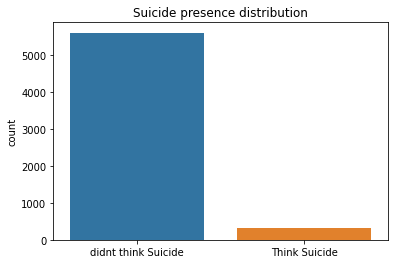

In [ ]:
f = sns.countplot(x='mh_suicide', data=df)
f.set_title("Suicide presence distribution")
f.set_xticklabels(['didnt think Suicide', 'Think Suicide'])
plt.xlabel("")

Text(0.5, 0, '')

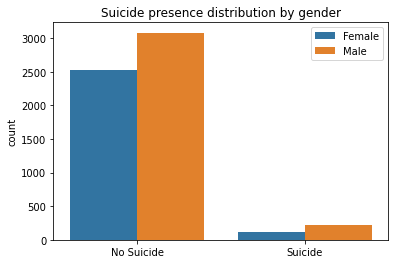

In [20]:
f = sns.countplot(x='mh_suicide', data=df, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Suicide presence distribution by gender")
f.set_xticklabels(['No Suicide', 'Suicide'])
plt.xlabel("")

상관계수 찍음.
의료데이터는 서로 독립변수가 아님.그래서 상관변수나 회귀분석으로 변수를 뽑았을때 점수와 같은 가벼운것이 아님. 그래도 공식이 될만하면 회귀분석을 통해 다중공선성을 적용할수있으나. 이런
의료데이터는 서로 관계가 깊기때문에 아래 나온대로 영향을 미쳤다고 볼수없음. 

=> 그래서 딥러닝을 통해 뭐가 제일 중요한 요소인지 파악함

In [21]:
mh_suicide_corr = df.corr()['mh_suicide']

mh_suicide_corr.sort_values(axis=0)

DF2_pr       -0.182007
LF_S2        -0.138665
allownc      -0.098459
edu          -0.091495
incm         -0.082476
                ...   
occp          0.090633
O_chew_d      0.111216
LF_SAFE       0.120603
mh_stress     0.220486
mh_suicide    1.000000
Name: mh_suicide, Length: 88, dtype: float64

Text(0.5, 0, '')

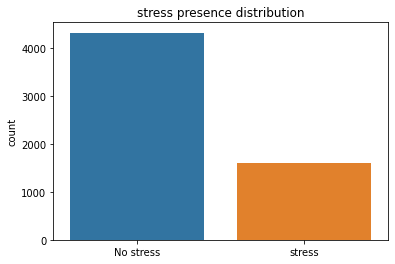

In [22]:
f = sns.countplot(x='mh_stress', data=df)
f.set_title("stress presence distribution")
f.set_xticklabels(['No stress', 'stress'])
plt.xlabel("")

Text(0.5, 0, '')

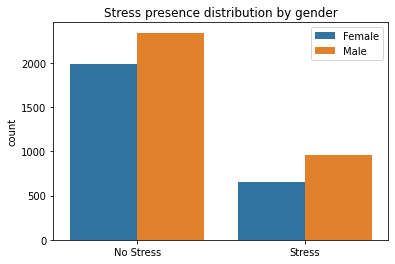

In [23]:
f = sns.countplot(x='mh_stress', data=df, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Stress presence distribution by gender")
f.set_xticklabels(['No Stress', 'Stress'])
plt.xlabel("")

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
#수치형:scaler 범주형:onehotencoder 
from sklearn.impute import SimpleImputer #null값 대치용
from sklearn.pipeline import FeatureUnion

In [26]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

 FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)])
    뉴메릭과 카테고리를 합침.

  원핫인코딩 -> 공간차지가 많아짐 

ex) 옷사이즈 처럼 하나를 골라아하는건 원핫인코딩, 근데 학년과같은 범주는 할 필요없음. impute만 한다. 

널값 대체시) 범주는 most+frequent 최빈값!

뉴메릭은 평균이나 중앙값중. -> 자신없으면 빼거나 해야함. 의료데이터의 경우 평균은 큰의미가없다. 회귀식에 넣어서 하는게좋음.

그리고 마지막으로 합해서 전처리를 한다

In [27]:
def pipeline(df, nums, cats):
    
    num_inputer = SimpleImputer(strategy='median')
    num_pipeline=Pipeline([
        ("select_numeric",DataFrameSelector(nums)),
        ("impute", num_inputer),
        ("scaler", StandardScaler())])
    #num : 수치형만 결측치대체후 scaler 적용
    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_pipeline = Pipeline([
        ("select_cat",DataFrameSelector(cats)),
        ("impute", cat_imputer)])
        #("encoder", OneHotEncoder())])
    #cat : 범주형만 가져와서 결측치 보정후, 데이터가 많아 원핫인코딩 생략
    preprocess_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)])
    
    X=preprocess_pipeline.fit_transform(df)
    #num(수치형) 과 cat(범주형) 을 합쳐서 전체 전처리함
    return X

넣어야함

In [28]:
nums = ['incm', 'edu', 'occp', 'marri_1', 'HE_wt', 'HE_wc', 'HE_BMI', 'N_EN', 'N_WATER', 'N_PROT', 'N_FAT', 'N_SFA', 'N_MUFA', 'N_PUFA', 'N_CHOL', 'N_CHO', 'N_TDF', 'N_CA', 'N_FE', 'N_NA', 'N_K', 'N_VITC', 'LF_SAFE', 'LF_S2']
cats = ['apt_t', 'sex', 'cfam', 'allownc', 'house', 'live_t', 'marri_2', 'tins', 'npins', 'DI2_pr', 'DI3_pr', 'DI4_pr', 'DI5_pr', 'DI6_pr', 'DM1_pr', 'DM2_pr', 'DM3_pr', 'DM4_pr', 'D_8_2', 'D_8_4', 'DJ4_pr', 'DE1_pr', 'DE2_pr', 'DC1_pr', 'DC2_pr', 'DC3_pr', 'DC4_pr', 'DC5_pr', 'DC6_pr', 'DC7_pr', 'DF2_pr', 'DL1_pr', 'DJ8_pr', 'DH2_pr', 'DH3_pr', 'DN1_pr', 'DK8_pr', 'DK9_pr', 'DK4_pr', 'LQ4_00', 'LQ1_sb', 'LQ_1EQL', 'LQ_2EQL', 'LQ_3EQL', 'LQ_4EQL', 'LQ_5EQL', 'educ', 'EC1_1', 'BO1', 'BO1_1', 'BO2_1', 'BD1_11', 'mh_stress', 'BE8_1', 'HE_HP', 'HE_anem', 'O_chew_d', 'L_BR_FQ', 'L_LN_FQ', 'L_DN_FQ']

그리고 위에 정의했던 전처리과정 pipeline 에다가 넣어서 진행시킴

#x 데이터만 전처리 완료!

In [29]:
X_data = pipeline(df2, nums, cats)

y 레이블 분리하면서 y 데이터 전처리 진행

In [31]:
y_label = df2['mh_suicide']

In [32]:
from sklearn.model_selection import train_test_split


train_test_split 을 사용해 비중을 똑같이하면서 잘라줌. ??

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.3, random_state=0)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [34]:
print('Train data shape: {0}'.format(X_train.shape))
print('Test data shape: {0}'.format(X_test.shape))

print('Train data label => %s' %Counter(y_train))
print('Test data label => %s' %Counter(y_test))

Train data shape: (4154, 84)
Test data shape: (1781, 84)
Train data label => Counter({0.0: 3926, 1.0: 228})
Test data label => Counter({0.0: 1685, 1.0: 96})


#smote 모델 이용 -> 데이터 맞추기

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

In [36]:
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 전 레이블 값 분포: \n', pd.Series(y_train).value_counts())
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (4154, 84) (4154,)
SMOTE 적용 전 레이블 값 분포: 
 0.0    3926
1.0     228
dtype: int64
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (7852, 84) (7852,)
SMOTE 적용 후 레이블 값 분포: 
 0.0    3926
1.0    3926
dtype: int64
